# Demo 3: Modern Visualization Tools

## Learning Objectives
- Create interactive visualizations with vega-altair
- Understand grammar of graphics approach
- Explore vega-lite specifications
- Compare modern tools (altair, plotnine, plotly)
- Export visualizations in multiple formats
- Build comprehensive dashboards and complex visualizations

## Setup

Let's import the necessary libraries for modern visualization tools.

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set inline plotting for Jupyter
%matplotlib inline

# Set style
plt.style.use('default')
sns.set_style('whitegrid')

## Part 1: vega-altair Grammar of Graphics

altair implements Vega-Lite grammar of graphics with a declarative syntax that separates data, marks, and encodings.

### Basic Chart Creation

altair uses the pattern: `Chart(data).mark_type().encode(mappings)`.

In [66]:
import altair as alt

# Create comprehensive sample data
np.random.seed(42)
data = pd.DataFrame({
    'x': np.random.randn(100),
    'y': np.random.randn(100),
    'category': np.random.choice(['A', 'B', 'C'], 100),
    'size': np.random.uniform(10, 100, 100),
    'value': np.random.uniform(0, 100, 100)
})

# Basic scatter plot
scatter = alt.Chart(data).mark_circle().encode(
    x='x:Q',
    y='y:Q'
)

scatter

alt.Chart(...)

### Choosing the Right Mark Type

Different mark types are suited for different data relationships and questions.

In [67]:
# Scatter plot - shows relationships between two continuous variables
scatter = alt.Chart(data).mark_circle().encode(
    x='x:Q',
    y='y:Q',
    color='category:N'
)
scatter

alt.Chart(...)

In [68]:
# Bar chart - compares values across categories
bar = alt.Chart(data).mark_bar().encode(
    x='category:N',
    y='value:Q',
    color='category:N'
)
bar

alt.Chart(...)

In [69]:
# Line chart - shows trends over time or ordered data
line = alt.Chart(data).mark_line().encode(
    x='x:Q',
    y='y:Q',
    color='category:N'
)
line

alt.Chart(...)

### Data Encoding and Visual Properties

Use encoding channels to map data to visual properties.

In [70]:
# Encoded scatter plot with multiple visual properties
encoded_chart = alt.Chart(data).mark_circle(size=100).encode(
    x='x:Q',
    y='y:Q',
    color='category:N',
    size='value:Q',
    opacity=alt.value(0.7),
    tooltip=['x', 'y', 'category', 'value']
)

encoded_chart

alt.Chart(...)

### Faceting and Layering

Create complex visualizations with faceting and layering.

In [71]:
# Faceted chart
faceted_chart = alt.Chart(data).mark_circle().encode(
    x='x:Q',
    y='y:Q',
    color='category:N'
).facet('category:N', columns=2)

faceted_chart

alt.FacetChart(...)

### Layered Charts

Combine multiple mark types in a single chart.

In [72]:
# Layered chart with points and trend line
base = alt.Chart(data).encode(
    x='x:Q',
    y='y:Q'
)

layered_chart = alt.layer(
    base.mark_circle(color='lightblue', opacity=0.6),
    base.mark_line(color='red', strokeWidth=2).transform_regression('x', 'y')
)

layered_chart

alt.LayerChart(...)

## Part 2: Interactive Features

altair makes interactivity effortless with built-in methods.

### Basic Interactivity

In [73]:
# Interactive scatter plot with zoom and pan
interactive_chart = alt.Chart(data).mark_circle().encode(
    x='x:Q',
    y='y:Q', 
    color='category:N',
    tooltip=['x', 'y', 'category', 'value']
).interactive()

interactive_chart

alt.Chart(...)

### Selection and Filtering

Add interactive selection and filtering capabilities.

In [74]:
# Create interval selection
selection = alt.selection_interval()

# Chart with selection
selectable_chart = alt.Chart(data).mark_circle().encode(
    x='x:Q',
    y='y:Q',
    color=alt.condition(selection, 'category:N', alt.value('lightgray')),
    opacity=alt.condition(selection, alt.value(0.8), alt.value(0.2))
).add_selection(selection)

selectable_chart

/var/folders/43/0jfkbfr53g1_nbv1ymsqgfl40000gp/T/ipykernel_51274/2199031540.py:10: AltairDeprecationWarning:


Deprecated since `altair=5.0.0`. Use add_params instead.



alt.Chart(...)

### Point Selection

In [75]:
# Point selection
point_selection = alt.selection_single()

# Chart with point selection
point_chart = alt.Chart(data).mark_circle().encode(
    x='x:Q',
    y='y:Q',
    color=alt.condition(point_selection, 'category:N', alt.value('lightgray')),
    size=alt.condition(point_selection, alt.value(200), alt.value(50))
).add_selection(point_selection)

point_chart

/var/folders/43/0jfkbfr53g1_nbv1ymsqgfl40000gp/T/ipykernel_51274/88961687.py:2: AltairDeprecationWarning:


Deprecated since `altair=5.0.0`. Use selection_point instead.

/var/folders/43/0jfkbfr53g1_nbv1ymsqgfl40000gp/T/ipykernel_51274/88961687.py:10: AltairDeprecationWarning:


Deprecated since `altair=5.0.0`. Use add_params instead.



alt.Chart(...)

### Cross-filtering

Create linked charts that filter each other.

In [76]:
# Create selection
brush = alt.selection_interval()

# Scatter plot
scatter = alt.Chart(data).mark_circle().encode(
    x='x:Q',
    y='y:Q',
    color=alt.condition(brush, 'category:N', alt.value('lightgray'))
).add_selection(brush)

# Histogram that responds to selection
histogram = alt.Chart(data).mark_bar().encode(
    x=alt.X('value:Q', bin=alt.Bin(maxbins=20)),
    y='count()',
    color=alt.condition(brush, alt.value('steelblue'), alt.value('lightgray'))
).transform_filter(brush)

# Combine charts
alt.vconcat(scatter, histogram)

/var/folders/43/0jfkbfr53g1_nbv1ymsqgfl40000gp/T/ipykernel_51274/3206752564.py:9: AltairDeprecationWarning:


Deprecated since `altair=5.0.0`. Use add_params instead.



alt.VConcatChart(...)

## Part 3: Advanced altair Features

### Transformations

Apply data transformations within altair.

In [77]:
# Aggregation and grouping
agg_chart = alt.Chart(data).mark_bar().encode(
    x='category:N',
    y='mean(value):Q',
    color='category:N'
).add_selection(
    alt.selection_single()
)

agg_chart

/var/folders/43/0jfkbfr53g1_nbv1ymsqgfl40000gp/T/ipykernel_51274/3989036092.py:7: AltairDeprecationWarning:


Deprecated since `altair=5.0.0`. Use selection_point instead.

/var/folders/43/0jfkbfr53g1_nbv1ymsqgfl40000gp/T/ipykernel_51274/3989036092.py:6: AltairDeprecationWarning:


Deprecated since `altair=5.0.0`. Use add_params instead.



alt.Chart(...)

### Statistical Transformations

In [78]:
# Regression line with confidence interval
regression_chart = alt.Chart(data).mark_circle().encode(
    x='x:Q',
    y='y:Q'
) + alt.Chart(data).mark_line(color='red').transform_regression(
    'x', 'y'
).encode(
    x='x:Q',
    y='y:Q'
)

regression_chart

alt.LayerChart(...)

### Time Series Data

In [79]:
# Create time series data
dates = pd.date_range('2023-01-01', periods=100, freq='D')
ts_data = pd.DataFrame({
    'date': dates,
    'value': np.cumsum(np.random.randn(100)),
    'category': np.random.choice(['A', 'B', 'C'], 100)
})

# Time series chart
ts_chart = alt.Chart(ts_data).mark_line().encode(
    x='date:T',
    y='value:Q',
    color='category:N'
).interactive()

ts_chart

alt.Chart(...)

## Part 4: Export Formats

altair supports multiple output formats for different use cases.

In [80]:
# Export to different formats
chart = alt.Chart(data).mark_circle().encode(x='x:Q', y='y:Q')

# Static formats
chart.save('scatter.png')      # Static bitmap
chart.save('scatter.svg')      # Static vector
chart.save('interactive.html') # Interactive HTML
chart.save('scatter.json')     # Vega-Lite JSON specification

print("Exported to PNG, SVG, HTML, and JSON formats")

Exported to PNG, SVG, HTML, and JSON formats


### Vega-Lite Specifications

In [81]:
# Get Vega-Lite specification
spec = chart.to_json()
print("Vega-Lite JSON specification:")
print(spec[:300] + "...")

Vega-Lite JSON specification:
{
  "$schema": "https://vega.github.io/schema/vega-lite/v5.20.1.json",
  "config": {
    "view": {
      "continuousHeight": 300,
      "continuousWidth": 300
    }
  },
  "data": {
    "name": "data-3f135e37e5dc61ca039f0f01b2917013"
  },
  "datasets": {
    "data-3f135e37e5dc61ca039f0f01b2917013": ...


## Part 5: Other Modern Tools

### plotnine (ggplot2 for Python)

plotnine brings R's ggplot2 syntax to Python.

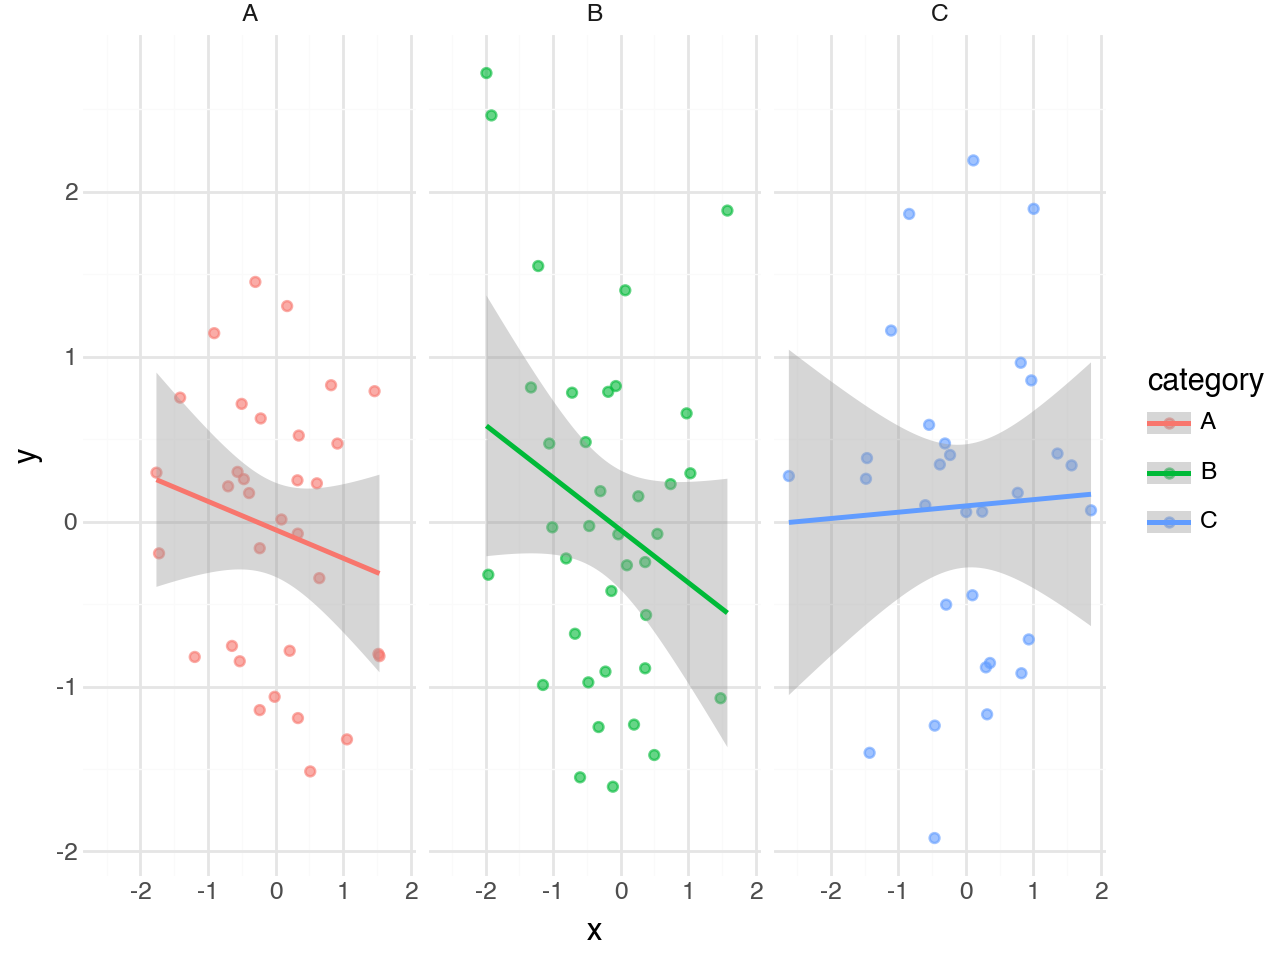

In [82]:
from plotnine import ggplot, aes, geom_point, geom_smooth, theme_minimal, facet_wrap

# Create ggplot2-style plot
p = (ggplot(data, aes(x='x', y='y', color='category')) 
     + geom_point(alpha=0.6)
     + geom_smooth(method='lm')
     + theme_minimal()
     + facet_wrap('~category'))

p

### Advanced plotnine Features

/Users/christopher/Documents/datasci_217/.venv/lib/python3.13/site-packages/plotnine/stats/stat_bin.py:112: PlotnineWarning:

'stat_bin()' using 'bins = 5'. Pick better value with 'binwidth'.



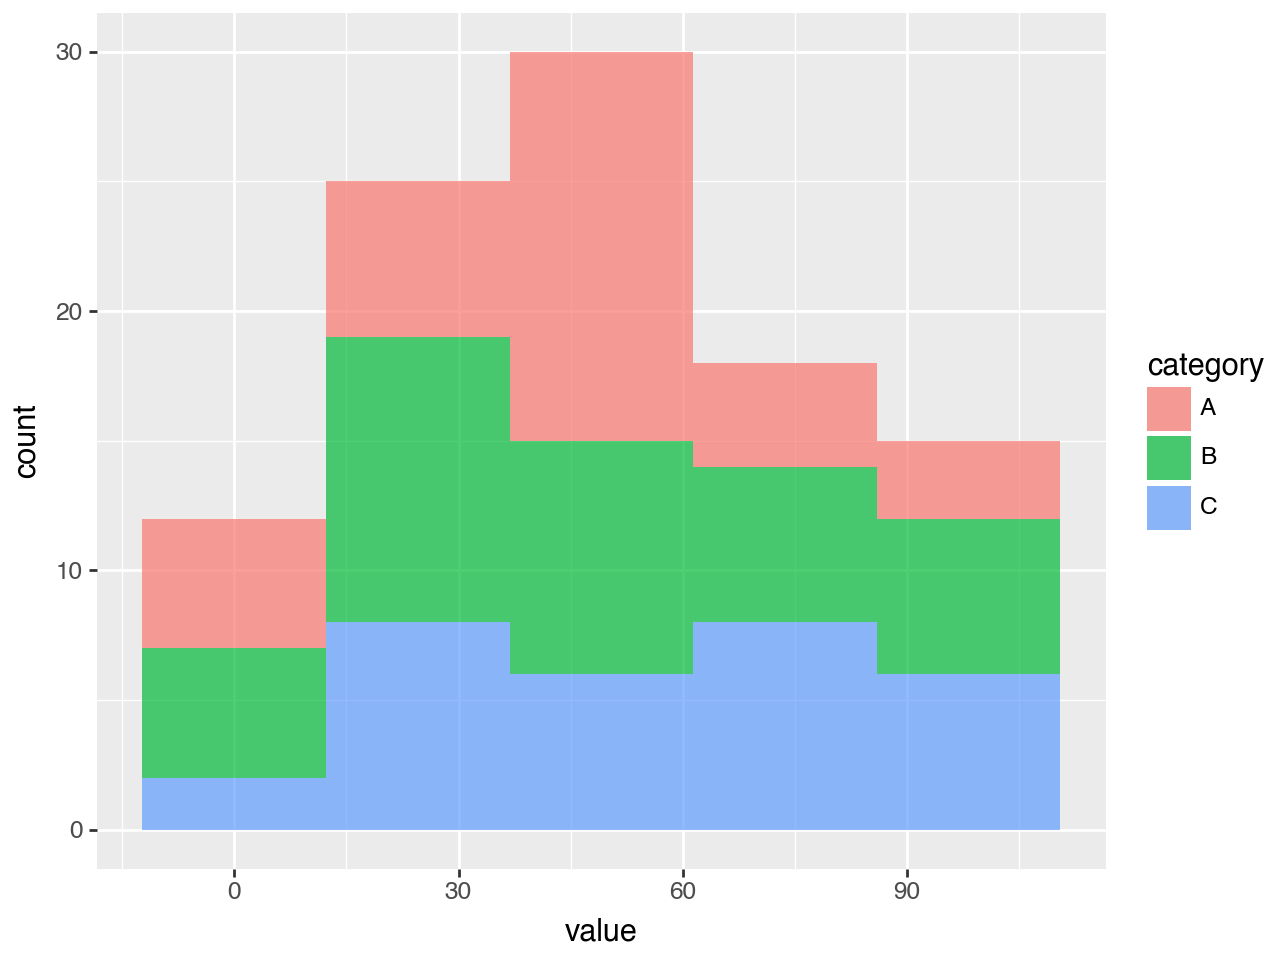

In [83]:
from plotnine import ggplot, aes, geom_histogram, geom_density, geom_boxplot

# Histogram
histogram = ggplot(data, aes(x='value', fill='category')) + geom_histogram(alpha=0.7)
histogram

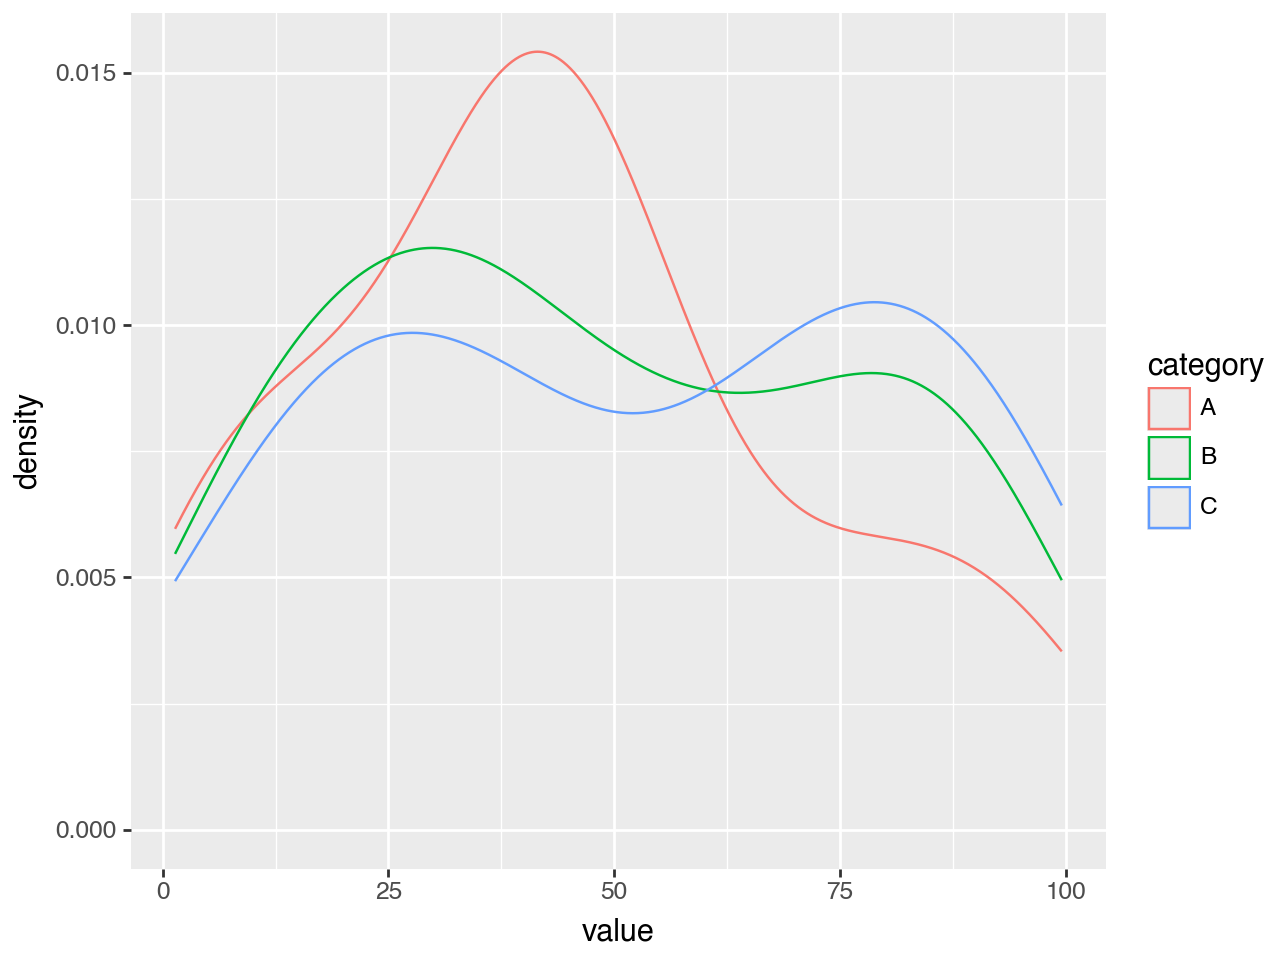

In [84]:
# Density plot
density = ggplot(data, aes(x='value', color='category')) + geom_density()
density

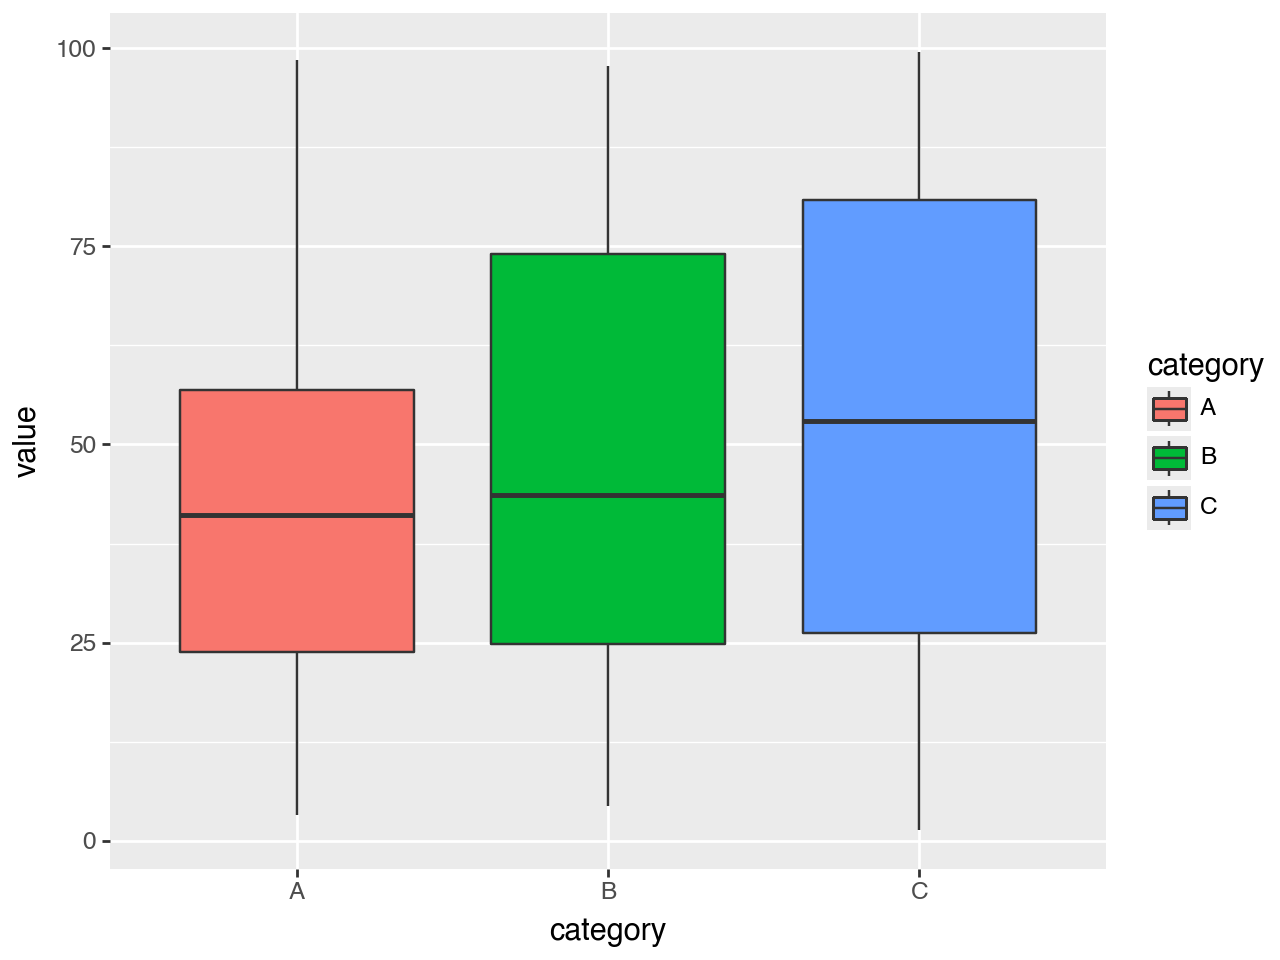

In [85]:
# Box plot
boxplot = ggplot(data, aes(x='category', y='value', fill='category')) + geom_boxplot()
boxplot

### Bokeh (Interactive Web Visualizations)

Bokeh creates interactive web-based visualizations.

In [86]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import HoverTool

output_notebook()

# Create Bokeh plot with interactivity
p = figure(title="Bokeh Interactive Scatter Plot", 
           x_axis_label='x', y_axis_label='y',
           tools="pan,wheel_zoom,box_zoom,reset")

# Add hover tool
hover = HoverTool(tooltips=[("Category", "@category"), 
                           ("Value", "@value"),
                           ("Size", "@size")])
p.add_tools(hover)

# Add data
p.circle(data['x'], data['y'], size=data['size']/10, 
         color='steelblue', alpha=0.6)

show(p)

Loading BokehJS ...

/var/folders/43/0jfkbfr53g1_nbv1ymsqgfl40000gp/T/ipykernel_51274/1828329305.py:19: BokehDeprecationWarning:

'circle() method with size value' was deprecated in Bokeh 3.4.0 and will be removed, use 'scatter(size=...) instead' instead.



### Plotly (Interactive Dashboards)

Plotly is excellent for creating interactive dashboards and web applications.

In [87]:
import plotly.express as px

# Create Plotly scatter plot
fig = px.scatter(data, x='x', y='y', color='category', 
                 size='value', hover_data=['value'],
                 title="Plotly Interactive Scatter Plot")
fig.show()

In [88]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create subplots
fig2 = make_subplots(rows=2, cols=2, 
                    subplot_titles=('Scatter', 'Histogram', 'Box Plot', 'Density'))

# Add traces
fig2.add_trace(go.Scatter(x=data['x'], y=data['y'], mode='markers', name='Scatter'), row=1, col=1)
fig2.add_trace(go.Histogram(x=data['value'], name='Histogram'), row=1, col=2)
fig2.add_trace(go.Box(y=data['value'], name='Box Plot'), row=2, col=1)
fig2.add_trace(go.Histogram(x=data['value'], histnorm='probability density', name='Density'), row=2, col=2)

fig2.update_layout(height=600, showlegend=False, title_text="Plotly Subplots")
fig2.show()

## Part 6: Tool Comparison and Selection

### Comprehensive Tool Comparison

| Tool | Best For | Learning Curve | Interactivity | Output Formats | Grammar |
|------|----------|----------------|---------------|----------------|---------|
| matplotlib | Custom plots, publication quality | High | None | PNG/SVG/PDF | Imperative |
| seaborn | Statistical plots, beautiful defaults | Low | None | PNG/SVG/PDF | Imperative |
| pandas | Quick exploration, basic charts | Very Low | None | PNG/SVG/PDF | Imperative |
| altair | Interactive plots, grammar of graphics | Medium | Built-in | PNG/SVG/HTML/JSON | Declarative |
| plotnine | R users, layered approach | Medium | None | PNG/SVG/PDF | Declarative |
| bokeh | Interactive web visualizations | High | High | HTML/JS | Imperative |
| plotly | Dashboards, web applications | Medium | High | HTML/JS | Declarative |

### When to Use Each Tool

**Tool Selection Guide:**

1. **Quick exploration** → `pandas.plot()`
2. **Statistical analysis** → `seaborn`
3. **Custom/publication plots** → `matplotlib`
4. **Interactive web plots** → `altair`, `bokeh`, `plotly`
5. **R users** → `plotnine`
6. **Grammar of graphics** → `altair`, `plotnine`
7. **Dashboards** → `plotly`, `bokeh`
8. **Multiple export formats** → `altair`

## Part 7: Building a Complete Dashboard

### Multi-panel altair Dashboard

In [89]:
# Create a comprehensive dashboard
# Scatter plot
scatter = alt.Chart(data).mark_circle().encode(
    x='x:Q',
    y='y:Q',
    color='category:N',
    tooltip=['x', 'y', 'category', 'value']
).properties(width=300, height=200)

# Histogram
hist = alt.Chart(data).mark_bar().encode(
    x=alt.X('value:Q', bin=alt.Bin(maxbins=20)),
    y='count()',
    color='category:N'
).properties(width=300, height=200)

# Box plot
box = alt.Chart(data).mark_boxplot().encode(
    x='category:N',
    y='value:Q',
    color='category:N'
).properties(width=300, height=200)

# Combine into dashboard
dashboard = alt.hconcat(
    alt.vconcat(scatter, hist),
    box
).resolve_scale(color='independent')

dashboard

alt.HConcatChart(...)

## Key Takeaways

1. **altair**: Grammar of graphics with built-in interactivity and multiple export formats
2. **vega-lite**: JSON specifications work across different tools and platforms
3. **plotnine**: Perfect for R users familiar with ggplot2
4. **Bokeh/Plotly**: Excellent for interactive web applications and dashboards
5. **Tool Selection**: Choose based on your audience, output format, and familiarity
6. **Interactivity**: Modern tools make interactive visualizations accessible
7. **Grammar of Graphics**: Declarative approach separates data, marks, and encodings
8. **Export Flexibility**: Different tools excel at different output formats